# Vue 02 Basic Syntax 01

## Template Syntax

### 개요

#### Template Syntax
DOM을 기본 구성 요소로 인스턴스 데이터에 `선언적으로 바인딩(Vue Instance와 DOM)`할 수 있는 HTML 기반 `템플릿 구문(확장된 문법 제공)`을 사용

#### Template Syntax 종류
1. Template Interpolation

2. Raw HTML
3. Attribute Bindings
4. Javascript Expressions

##### 1. Text Interpolation 
```js
<p>Message: {{ msg }}</p>
```
- 데이터 바인딩의 가장 기본적인 형태 

- 이중 중괄호 구문 (콧수염 구문)을 사용 
- 콧수염 구문은 해당 구성 요소 인스턴스의 msg 속성 값으로 대체 
- msg 속성이 변경될 때마다 업데이트 됨

##### 2. Raw HTML 
```js
<div v-html="rawHtml"></div> 

const rawHtml = ref('<span style="color:red">This should be red.</span>') 
```
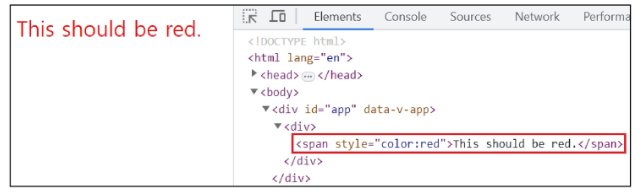

콧수염 구문은 데이터를 일반 텍스트로 해석하기 때문에 실제 HTML을 출력하려면 v-html을 사용해야 함

##### 3. Attribute Bindings 
```js
<div v-bind:id="dynamicId"></div> 
const dynamicId = ref('my-id')
```
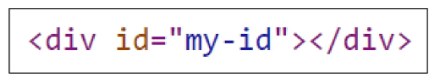
- 콧수염 구문은 HTML 속성 내에서 사용할 수 없기 때문에 v-bind를 사용 
- HTML의 id 속성 값을 vue의 dynamicId 속성과 동기화 되도록 함 
- 바인딩 값이 null이나 undefind인 경우 렌더링 요소에서 제거됨

##### 4. JavaScript Expressions 
```js
{{ number + 1}} 
{{ ok? 'YES': 'NO' }} 
{{ message.split('').reverse().join('') }} 
<div v-bind:id="list-${id}`"></div>
```
- Vue는 모든 데이터 바인딩 내에서 JavaScript 표현식의 모든 기능을 지원 

- Vue 템플릿에서 JavaScript 표현식을 사용할 수 있는 위치 
    1. 콧수염 구문 내부 
    2. 모든 directive의 속성 값 ("v-”로 시작하는 특수 속성)

#### Expressions 주의사항 
- 각 바인딩에는 하나의 단일 표현식만 포함될 수 있음
- 표현식은 값으로 평가할 수 있는 코드 조각 `(return 뒤에 사용할 수 있는 코드여야 함)`

- 작동하지 않는 경우 
```html
    <!-- 표현식이 아닌 선언식 --> 
    {{ const number = 1 }} 

    <!-- 제어문은 삼항 표현식을 사용해야 함 -->
    {{ if (ok) { return message } }}
```

### Driective

#### Directive 
'v-' 접두사가 있는 특수 속성

#### Directive 특징 
- Directive의 속성 값은 단일 JavaScript 표현식이어야 함(v-if=`"seen"`) (v-for, v-on 제외) 
- 표현식 값이 변경될 때 DOM에 반응적으로 업데이트를 적용 

- 예시 
```js
    <p v-if="seen">Hi There</p>
```

#### Directive 전체 구문
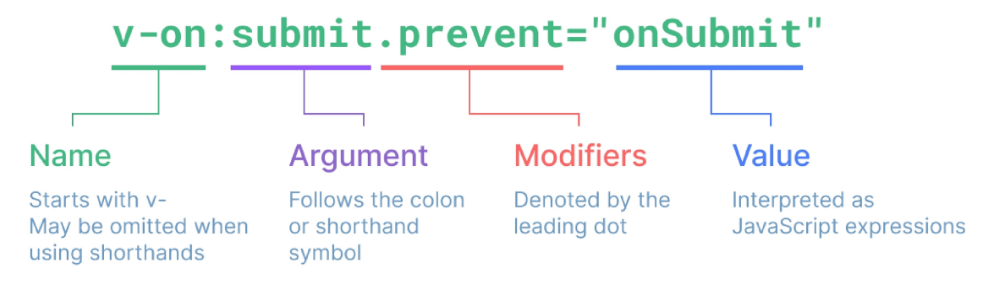

#### Directive - "Arguments" 
- 일부 directive는 directive 뒤에 콜론(“:”)으로 표시되는 인자를 사용할 수 있음

- 아래 예시의 href는 HTML `<a>` 요소의 href 속성 값을 myUrl 값에 바인딩 하도록 하는 v-bind의 인자 
```html
    <a v-bind:href="myUrl">Link</a> 
```
- 아래 예시의 click은 이벤트 수신할 이벤트 이름을 작성하는 v-on의 인자 
```html
    <button v-on:click="doSomething">Button</button>
```

#### Directive - "Modifiers" 
- “. (dot)”로 표시되는 특수 접미사로, directive가 특별한 방식으로 바인딩되어야 함을 나타냄 

- 아래 예시의.prevent는 발생한 이벤트에서 event.preventDefault()를 호출하도록 v-on에 지시하는 modifier 
```html
    <!-- prevent Default() > 이벤트 동작 취소 -->
    <form v-on:submit.prevent="onSubmit">  
        <input type="submit"> 
    </form>
```

#### Built-in Directives 
- v-text 

- v-show 
- v-if 
- v-for 
- ...
- https://vuejs.org/api/built-in-directives.html

## Dynamically data binding

### v-bind

#### v-bind 
하나 이상의 속성 또는 컴포넌트 데이터를 표현식에 동적으로 바인딩(연결)

#### v-bind 사용처 
1. Attribute Bindings 

2. class and Style Bindings

### Attribute Bindings

#### Attribute Bindings (속성 바인딩) 
- HTML의 속성 값을 Vue의 상태 속성 값과 동기화 되도록 함 
```html
    <!-- v-bind.html --> 
    
    <img v-bind:src="imageSrc"> 
    <a v-bind:href="myUrl">Move to url</a>
``` 

- v-bind shorthand (약어) 
    - ':' (colon) 
```html
    <img :src="imageSrc"> 
    <a :href="myUrl">Move to url</a>
```

#### Dynamic attribute name (동적 인자 이름) 
- 대괄호([])로 감싸서 directive argument에 JavaScript 표현식을 사용할 수 있음 
- 표현식에 따라 동적으로 평가된 값이 최종 argument 값으로 사용됨 
  
```html
    <button :[key]="myValue"></button>
```
    - `대괄호 안에 작성하는 이름은 반드시 소문자로만 구성 가능 (브라우저가 속성 이름을 소문자로 강제 변환하기 때문)`

#### Attribute Bindings 예시
```html
<!-- v-bind.html --> 
 
<img :src="imageSrc"> 
<a :href="myUrl">Move to url</a> 
<p :[dynamicattr]="dynamicValue">...</p>
```
```js
const { createApp, ref } = Vue 

const app = createApp({ 
    setup() { 
        const imageSrc = ref('https://picsum.photos/200') 
        const myUrl = ref('https://www.google.co.kr/') 
        const dynamicattr = ref('title')        // camel case 아님.
        const dynamicValue = ref('Hello Vue.js') 
        return { 
            imageSrc, 
            myUrl, 
            dynamicattr, 
            dynamicValue 
        }
    }
})

app.mount('#app')
```
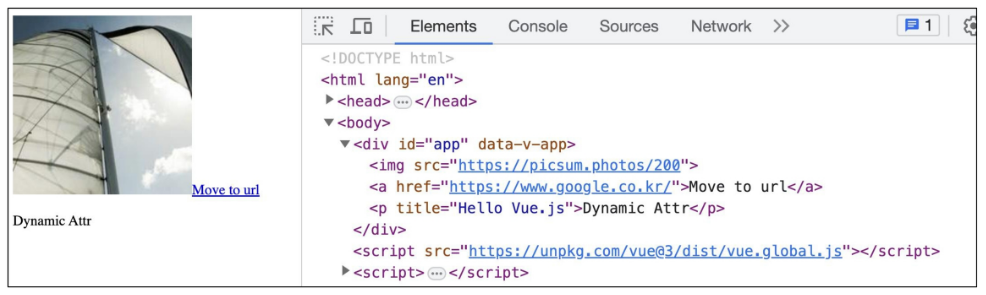

### Class and Style Bindings

#### Class and Style Bindings (클래스와 스타일 바인딩) 
- class와 style은 모두 HTML 속성이므로 다른 속성과 마찬가지로 v-bind를 사용하여 동적으로 문자열 값을 할당할 수 있음 

- Vue는 class 및 style 속성 값을 v-bind로 사용할 때 `객체` 또는 `배열`을 활용하여 작성할 수 있도록 함 
    - 단순히 문자열 연결을 사용하여 이러한 값을 생성하는 것은 번거롭고 오류가 발생하기가 쉽기 때문

#### Class and Style Bindings가 가능한 경우 
1. Binding HTML Classes 

    1.1 Binding to Objects 

    1.2 Binding to Arrays 

2. Binding Inline Styles 

    2.1 Binding to Objects 
    
    2.2 Binding to Arrays

##### 1.1 Binding HTML Classes - Binding to Objects
- 객체를 : class에 전달하여 클래스를 동적으로 전환할 수 있음 

- 예시 1 
    - isActive의 Boolean 값에 의해 active 클래스의 존재가 결정됨 
```html
    <!-- binding-html-classes.html --> 
```
```js
    const isActive = ref(false) 

    <div class="{ active: isActive }">Text</div>
```

- 객체에 더 많은 필드를 포함하여 여러 클래스를 전환할 수 있음 

- 예시 2 
    - :class directive를 일반 클래스 속성과 함께 사용 가능 
```js
    const isActive = ref(false) 
    const hasInfo = ref(true) 
```
```html
    <div 
        class="static" 
        :class="{ active: isActive, 'text-primary': hasInfo }"
    >
    Text
    </div>
```

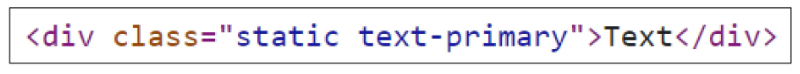

- 반드시 inline 방식으로 작성하지 않아도 됨 

- 반응형 변수를 활용해 객체를 한번에 작성하는 방법 

```js
    const isActive = ref (false) 

    // ref는 반응 객체의 속성으로 액세스되거나 변경될 때 자동으로 unwrap 
    const classObj = ref({ 
        active: isActive, 
        'text-primary': hasInfo 
    }) 

    <div class="static" class="classObj">Text</div>
```

##### 1.2 Binding HTML Classes - Binding to Arrays
- :class를 배열에 바인딩하여 클래스 목록을 적용할 수 있음
 
- 예시 1 
```js
    const activeClass = ref('active') 
    const infoClass = ref('text-primary') 

    <div class="[activeClass, infoClass]">Text</div>
```
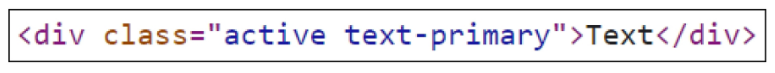
- 배열 구문 내에서 객체 구문을 사용하는 경우 

- 예시 2 
```js
    <div class="[{ active: isActive }, infoClass]">Text</div>
```

##### 2.1 Binding Inline Styles - Binding to Objects 
- :style은 JavaScript 객체 값에 대한 바인딩을 지원 (HTML style 속성에 해당) 

- 예시 1 
```html
<!-- binding-inline-styles.html -->
```
```js
const activeColor = ref('crimson')
const fontSize = ref(50) 
```
```html
<div :style="{ color: activeColor, fontSize: fontSize + 'px' }">Text</div>
```
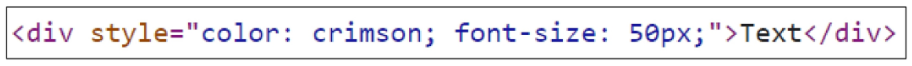

- 실제 CSS에서 사용하는 것처럼 : style은 kebab-cased 키 문자열도 지원 (단, camelCase 작성을 권장)

- 예시 2 
```html
<div :style="{ 'font-size': fontSize + 'px' }">Text</div>
```
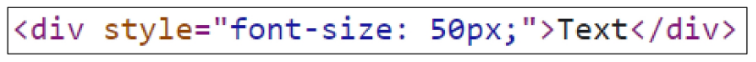

- 반드시 inline 방식으로 작성하지 않아도 됨 

- 반응형 변수를 활용해 객체를 한번에 작성하는 방법 
- 예시 3 
```js
const styleObj = ref({ 
    color: activeColor, 
    fontSize: fontSize.value + 'px' 
}) 
```
```html
<div :style="styleObj">Text</div>
```
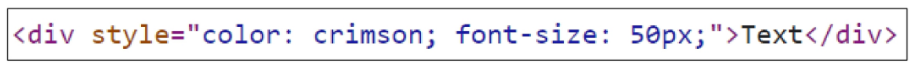

##### 2.2 Binding Inline Styles - Binding to Arrays 
- 여러 스타일 객체를 배열에 작성해서 : style을 바인딩할 수 있음 

- 작성한 객체는 병합되어 동일한 요소에 적용 
- 예시 3 
```js
const style0bj2 = ref({ 
    color: 'blue', 
    border: '1px solid black' 
}) 
```
```html
<div :style="[styleObj, style0bj2]">Text</div>
```
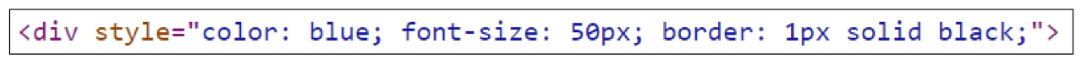

### v-bind 종합 
https://vuejs.org/api/built-in-directives.html#v-bind

## Event Handling

### v-on

#### v-on 
DOM 요소에 이벤트 리스너를 연결 및 수신

#### v-on 구성
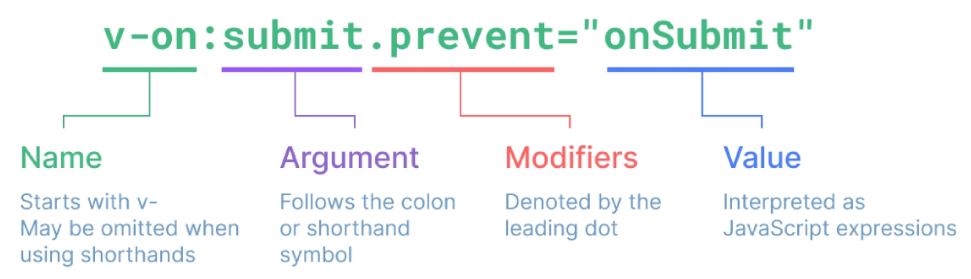
```js
    v-on:event="handler" 
```
- handler 종류 
    1. Inline handlers : 이벤트가 트리거 될 때 실행 될 JavaScript 코드 
    2. Method handlers : 컴포넌트에 정의된 메서드 이름 

- v-on shorthand (약어) 
    - '@' 
```js
    @event="handler"
```

##### 1. Inline handlers 
- Inline handlers는 주로 간단한 상황에 사용 
```html
<!-- event-handling.html -->
```
```js
const count = ref(0) 
```

```html
<button @click="count++">Add 1</button> 
<p>Count: {{ count }}</p>
```

##### Inline Handlers에서의 메서드 호출 메서드 
- 이름에 직접 바인딩하는 대신 Inline Handlers에서 메서드를 호출할 수도 있음 

- 이렇게 하면 기본 이벤트 대신 사용자 지정 인자를 전달할 수 있음 
```js
    const greeting = function (message) { 
        console.log(message) 
    } 
```
```html
    <button @click="greeting('hello')">Say hello</button> 
    <button @click="greeting('bye')">Say bye</button>
```

##### Inline Handlers에서의 event 인자에 접근하기 
- Inline Handlers에서 원래 DOM 이벤트에 접근하기 

- $event 변수를 사용하여 메서드에 전달 
```js
    const warning = function (message, event) { 
        console.log(message) 
        console.log(event)
    } 
```
```html
    <button @click="warning('경고입니다.', $event)">Submit</button>
```
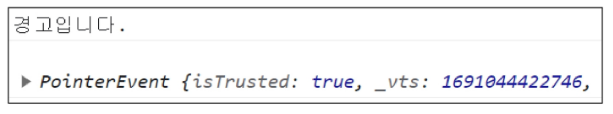

##### 2. Method Handlers
- Inline handlers로는 불가능한 대부분의 상황에서 사용 
```js
    const name = ref('Alice') 
    const myFunc = function (event) { 
        console.log(event) 
        console.log(event.currentTarget) 
        console.log('Hello ${name.value}!`) 
    } 
```
```html
    <button @click="myFunc">Hello</button>
```
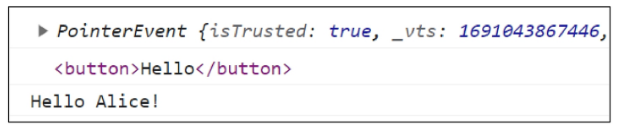

- Method Handlers는 이를 트리거하는 기본 DOM Event 객체를 자동으로 수신 
```js
    const myFunc = function (event) { 
        console.log(event) 
        console.log(event.currentTarget) 
        console.log('Hello ${name.value}!`)
} 
```

### Modifiers

#### Event Modifiers 
- Event Modifiers를 활용해 event.preventDefault()와 같은 구문을 메서드에서 작성하지 않도록 함 

- stop, prevent, self 등 다양한 modifiers를 제공 
- > 메서드는 DOM 이벤트에 대한 처리보다는 데이터에 관한 논리를 작성하는 것에 집중할 것 
```html
    <form @submit.prevent="onSubmit">...</form> 
    
    <a @click.stop.prevent="onLink">...</a>
``` 
- `Modifiers는 chained 되게끔 작성할 수 있으며 이때는 작성된 순서로 실행되기 때문에 작성 순서에 유의`

#### Key Modifiers 
- 키보드 이벤트를 수신할 때 특정 키에 관한 별도 modifiers를 사용할 수 있음

- 예시 
    - key가 Enter 일 때만 onSubmit 이벤트를 호출하기 
```html
    <input @keyup.enter="onSubmit">
```

### v-on 종합 
https://vuejs.org/api/built-in-directives.html#v-on

## Form Input Bindings

### Form Input Bindings (폼 입력 바인딩) 
- form을 처리할 때 사용자가 input에 입력하는 값을 실시간으로 JavaScript 상태에 동기화해야 하는 경우 `(양방향 바인딩)` 

- 양방향 바인딩 방법 
    1. v-bind와 v-on을 함께 사용 
    2. v-model 사용

### v-bind with v-on

#### 1. v-bind와 v-on을 함께 사용
1. v-bind를 사용하여 input 요소의 value 속성 값을 입력 값으로 사용 
2. v-on을 사용하여 input 이벤트가 발생 할 때마다 input 요소의 value 값을 별도 반응형 변수에 저장하는 핸들러를 호출

    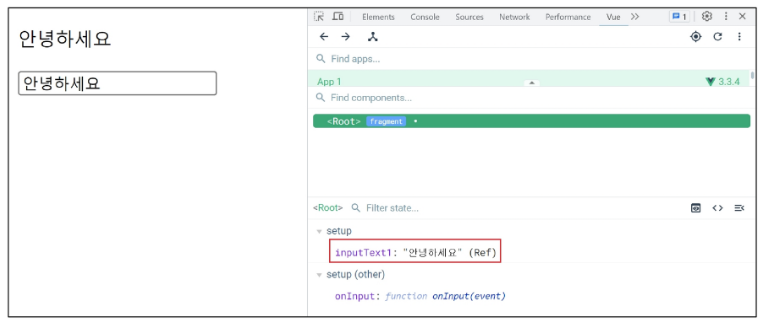
```html
    <!-- form-input-bindings.html --> 
```
```js
    const inputText1 = ref('') 
    const onInput = function (event) { 
        inputText1.value = event.currentTarget.value 
    } 
```
```html
    <p>{{ inputText1 }}</p> 
    <input :value="inputText1" @input="onInput">
```

### v-model

#### v-model 
form input 요소 또는 컴포넌트에서 양방향 바인딩을 만듦

1. v-model 사용 
- 사용자 입력 데이터와 반응형 변수를 실시간 동기화 
```js
    const inputText2 = ref('') 
```
```html
    <p>{{ inputText2 }}</p> 
    <input v-model="inputText2">
```
- 사용자 입력 데이터와 반응형 변수를 실시간 동기화 

- > IME가 필요한 언어(한국어, 중국어, 일본어 등)의 경우 v-model이 제대로 업데이트되지 않음 
- > 해당 언어에 대해 올바르게 응답하려면 v-bind와 v-on 방법을 사용해야 함
- 
    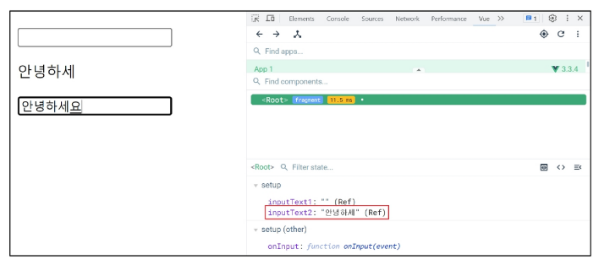

### v-model 활용

#### v-model과 다양한 입력(input) 양식 
v-model은 단순 Text input 뿐만 아니라 Checkbox, Radio, Select 등 다양한 타입의 사용자 입력 방식과 함께 사용 가능

#### Checkbox 활용
1. 단일 체크박스와 boolean 값 활용 

```html
    <!-- v-model.html -->
```
```js
    const checked = ref(false) 
    <input type="checkbox" id="checkbox" v-model="checked"> 
    <label for="checkbox">{{ checked }}</label>
```

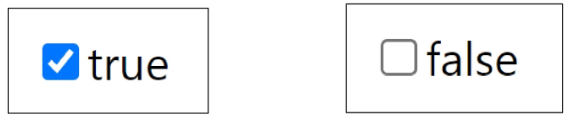

2. 여러 체크박스와 배열 활용 
    - 해당 배열에는 현재 선택된 체크박스의 값이 포함됨

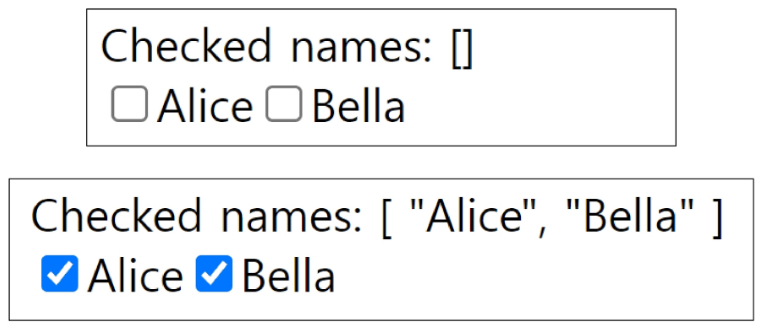

```js
const checkedNames = ref([])
```
```html
<div>Checked names: {{ checkedNames }}</div>
<input type="checkbox" id="alice" value="Alice" v-model="checkedNames"> 
<label for="alice">Alice</label> 
<input type="checkbox" id="bella" value="Bella" v-model="checkedNames"> 
<label for="bella">Bella</label>
```

#### Select 활용
select에서 v-model 표현식의 초기 값이 어떤 option과도 일치하지 않는 경우 select 요소는 “선택되지 않은(unselected)" 상태로 렌더링 됨

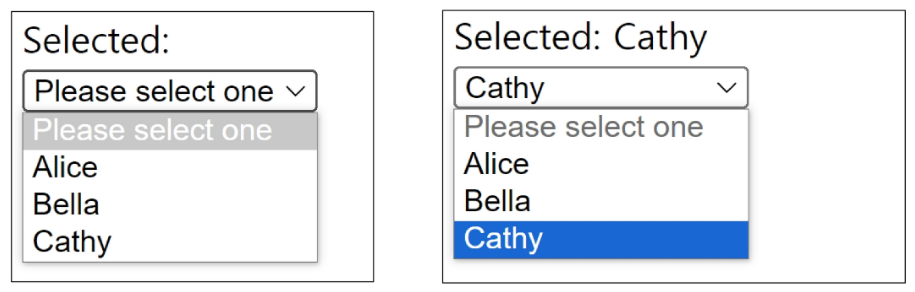

```js
const selected = ref('')
```
```html
<div>Selected: {{ selected }}</div> 
<select v-model="selected"> 
    <option disabled value="">Please select one</option> 
    <option>Alice</option> 
    <option>Bella</option> 
    <option>Cathy</option> 
</select>
```

### v-model 종합
https://vuejs.org/api/built-in-directives.html#v-model

## 참고


### 접두어 $

#### '$' 접두어가 붙은 변수 
- Vue 인스턴스 내에서 제공되는 내부 변수 

- > 사용자가 지정한 반응형 변수나 메서드와 구분하기 위함 
- > 주로 Vue 인스턴스 내부 상태를 다룰 때 사용

### IME


#### IME (Input Method Editor) 
- 사용자가 입력 장치에서 기본적으로 사용할 수 없는 문자(비영어권 언어)를 입력할 수 있도록 하는 운영 체제 구성 프로그램 
  
- 일반적으로 키보드 키보다 자모가 더 많은 언어에서 사용해야 함 
- > IME가 동작하는 방식과 Vue의 양방향 바인딩(v-model) 동작 방식이 상충하기 때문에 한국어 입력 시 예상대로 동작하지 않았던 것